## Vamo a importar los datos

In [1]:
import numpy as np
import pandas as pd
temp = pd.read_csv('COE.csv')

In [2]:
temp.head()

,Unnamed: 0,DATE,COE$,COE$_1,#Bids,Quota,Open?
0,0,1990-08-01,7400.0,7750.0,656,472,0
1,1,1990-09-01,11100.0,7400.0,1462,468,0
2,2,1990-10-01,5002.0,11100.0,633,472,0
3,3,1990-11-01,3170.0,5002.0,952,511,0
4,4,1990-12-01,3410.0,3170.0,919,471,0


In [3]:
data = temp.drop(temp.columns[[0,1]],axis=1)
data.head()

,COE$,COE$_1,#Bids,Quota,Open?
0,7400.0,7750.0,656,472,0
1,11100.0,7400.0,1462,468,0
2,5002.0,11100.0,633,472,0
3,3170.0,5002.0,952,511,0
4,3410.0,3170.0,919,471,0


In [4]:
y=data['COE$']
x=data.drop(data.columns[[0,4]],axis=1)
#Realiza la transformación logaritmica de x
x=x.apply(np.log)
x=pd.concat([x,data['Open?']],axis=1)
x.head()

,COE$_1,#Bids,Quota,Open?
0,8.955448,6.486161,6.156979,0
1,8.909235,7.287561,6.148468,0
2,9.314700,6.450470,6.156979,0
3,8.517593,6.858565,6.236370,0
4,8.061487,6.823286,6.154858,0


## Vamo a normalizar los datos

In [5]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [6]:
x = np.array(x).reshape((len(x),4))
x.shape

(265, 4)

In [7]:
x = scaler.fit_transform(x)

In [8]:
scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y),1))
y = np.log(y)
y = scaler_y.fit_transform(y)

# Train and Test Sets
For this illustration, the train set contains around 95% of the
observations, with the remaining allocated to the test set:

## Primero vamo a separar datos
 Crear los sets de entrenamiento  de prueba

In [9]:
end = len(x)-1
learn_end = int(end*0.954)
x_train = x[0:learn_end-1,]
x_test = x[learn_end:end-1,]
y_train = y[1:learn_end]
y_test = y[learn_end+1:end]
x_train = x_train.reshape(x_train.shape+(1,))
x_test = x_test.reshape(x_test.shape+(1,))

In [10]:
print('Shape of x_train is ', x_train.shape)
print('Shape of x_test is ', x_test.shape)

Shape of x_train is  (250, 4, 1)
Shape of x_test is  (12, 4, 1)


## Vamo a definir el modelo

In [11]:
# importa el modelo secuencial, permite apilar capas de manera lineal
from keras.models import Sequential
# importa la capa densa, esta es una capa de red neuronal completamente conectada regular
# con una función lineal de activación
from keras.layers import Dense, Activation
# Optimizador de descenso de gradiente estocástico
from keras.optimizers import SGD
# importa una red neuronal recurrente completamente conectada
from keras.layers import SimpleRNN


# importa todas las capas
#from keras.layers import *
#from keras.layers.recurrent import LSTM
#import numpy as np

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
# define una semilla para tener resultados repetibles
seed = 2016
np.random.seed(seed)
# Define el modelo secuencial
fit1 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit1.add(SimpleRNN(units=8, activation='tanh',input_shape=(4, 1)))
#Agrega una capa densa con una slida y activación lineal
fit1.add(Dense(units=1, activation='linear'))

Entonces, ¿cómo se establece el valor óptimo de impulso? A menudo es útil experimentar con diferentes valores. Una regla de oro es reducir la velocidad de aprendizaje cuando se usa mucho impulso.
Usando esta idea, seleccionamos una tasa de aprendizaje baja de 0.0001 combinada con un valor de impulso relativamente alto de 0.95:

In [13]:
# Notice we set nestrov = True to use Nesterov’s accelerated
#This is a first-order optimization method designed to improve stability and speed up convergence of gradient descent.

sgd = SGD(lr=0.0001, momentum=0.95, nesterov=True)
fit1.compile(loss='mean_squared_error', optimizer=sgd)

The larger the batch size, the more memory you
will need to run the model

# Entrena el modelo

In [14]:
#fit1.fit(x_train, y_train, batch_size=10, nb_epoch=700)
fit1.fit(x_train, y_train, batch_size=10, epochs=700)

Epoch 1/700
250/250 [==============================] - 0s 1ms/step - loss: 0.1802
Epoch 2/700
250/250 [==============================] - 0s 132us/step - loss: 0.1184
Epoch 3/700
250/250 [==============================] - 0s 136us/step - loss: 0.0890
Epoch 4/700
250/250 [==============================] - 0s 136us/step - loss: 0.0753
Epoch 5/700
250/250 [==============================] - 0s 140us/step - loss: 0.0645
Epoch 6/700
250/250 [==============================] - 0s 140us/step - loss: 0.0564
Epoch 7/700
250/250 [==============================] - 0s 136us/step - loss: 0.0498
Epoch 8/700
250/250 [==============================] - 0s 140us/step - loss: 0.0451
Epoch 9/700
250/250 [==============================] - 0s 132us/step - loss: 0.0412
Epoch 10/700
250/250 [==============================] - 0s 144us/step - loss: 0.0381
Epoch 11/700
250/250 [==============================] - 0s 152us/step - loss: 0.0356
Epoch 12/700
250/250 [==============================] - 0s 128us/step - loss

250/250 [==============================] - 0s 156us/step - loss: 0.0094
Epoch 98/700
250/250 [==============================] - 0s 140us/step - loss: 0.0093
Epoch 99/700
250/250 [==============================] - 0s 136us/step - loss: 0.0092
Epoch 100/700
250/250 [==============================] - 0s 140us/step - loss: 0.0092
Epoch 101/700
250/250 [==============================] - 0s 128us/step - loss: 0.0091
Epoch 102/700
250/250 [==============================] - 0s 124us/step - loss: 0.0090
Epoch 103/700
250/250 [==============================] - 0s 148us/step - loss: 0.0090
Epoch 104/700
250/250 [==============================] - 0s 164us/step - loss: 0.0089
Epoch 105/700
250/250 [==============================] - 0s 156us/step - loss: 0.0089
Epoch 106/700
250/250 [==============================] - 0s 156us/step - loss: 0.0088
Epoch 107/700
250/250 [==============================] - 0s 152us/step - loss: 0.0088
Epoch 108/700
250/250 [==============================] - 0s 160us/step

250/250 [==============================] - 0s 128us/step - loss: 0.0062
Epoch 193/700
250/250 [==============================] - 0s 128us/step - loss: 0.0062
Epoch 194/700
250/250 [==============================] - 0s 124us/step - loss: 0.0061
Epoch 195/700
250/250 [==============================] - 0s 124us/step - loss: 0.0061
Epoch 196/700
250/250 [==============================] - 0s 124us/step - loss: 0.0061
Epoch 197/700
250/250 [==============================] - 0s 144us/step - loss: 0.0061
Epoch 198/700
250/250 [==============================] - 0s 152us/step - loss: 0.0061
Epoch 199/700
250/250 [==============================] - 0s 152us/step - loss: 0.0061
Epoch 200/700
250/250 [==============================] - 0s 148us/step - loss: 0.0060
Epoch 201/700
250/250 [==============================] - 0s 132us/step - loss: 0.0060
Epoch 202/700
250/250 [==============================] - 0s 124us/step - loss: 0.0060
Epoch 203/700
250/250 [==============================] - 0s 124us/st

250/250 [==============================] - 0s 128us/step - loss: 0.0051
Epoch 288/700
250/250 [==============================] - 0s 140us/step - loss: 0.0051
Epoch 289/700
250/250 [==============================] - 0s 156us/step - loss: 0.0051
Epoch 290/700
250/250 [==============================] - 0s 160us/step - loss: 0.0050
Epoch 291/700
250/250 [==============================] - 0s 184us/step - loss: 0.0050
Epoch 292/700
250/250 [==============================] - 0s 196us/step - loss: 0.0050
Epoch 293/700
250/250 [==============================] - 0s 192us/step - loss: 0.0050
Epoch 294/700
250/250 [==============================] - 0s 180us/step - loss: 0.0050
Epoch 295/700
250/250 [==============================] - 0s 200us/step - loss: 0.0050
Epoch 296/700
250/250 [==============================] - 0s 192us/step - loss: 0.0050
Epoch 297/700
250/250 [==============================] - 0s 188us/step - loss: 0.0050
Epoch 298/700
250/250 [==============================] - 0s 188us/st

250/250 [==============================] - 0s 140us/step - loss: 0.0045
Epoch 383/700
250/250 [==============================] - 0s 132us/step - loss: 0.0045
Epoch 384/700
250/250 [==============================] - 0s 128us/step - loss: 0.0045
Epoch 385/700
250/250 [==============================] - 0s 132us/step - loss: 0.0045
Epoch 386/700
250/250 [==============================] - 0s 132us/step - loss: 0.0045
Epoch 387/700
250/250 [==============================] - 0s 136us/step - loss: 0.0045
Epoch 388/700
250/250 [==============================] - 0s 132us/step - loss: 0.0045
Epoch 389/700
250/250 [==============================] - 0s 132us/step - loss: 0.0045
Epoch 390/700
250/250 [==============================] - 0s 136us/step - loss: 0.0045
Epoch 391/700
250/250 [==============================] - 0s 132us/step - loss: 0.0044
Epoch 392/700
250/250 [==============================] - 0s 132us/step - loss: 0.0044
Epoch 393/700
250/250 [==============================] - 0s 136us/st

250/250 [==============================] - 0s 140us/step - loss: 0.0041
Epoch 478/700
250/250 [==============================] - 0s 144us/step - loss: 0.0041
Epoch 479/700
250/250 [==============================] - 0s 132us/step - loss: 0.0041
Epoch 480/700
250/250 [==============================] - 0s 160us/step - loss: 0.0041
Epoch 481/700
250/250 [==============================] - 0s 132us/step - loss: 0.0041
Epoch 482/700
250/250 [==============================] - 0s 136us/step - loss: 0.0041
Epoch 483/700
250/250 [==============================] - 0s 140us/step - loss: 0.0041
Epoch 484/700
250/250 [==============================] - 0s 204us/step - loss: 0.0041
Epoch 485/700
250/250 [==============================] - 0s 240us/step - loss: 0.0041
Epoch 486/700
250/250 [==============================] - 0s 176us/step - loss: 0.0041
Epoch 487/700
250/250 [==============================] - 0s 164us/step - loss: 0.0041
Epoch 488/700
250/250 [==============================] - 0s 168us/st

250/250 [==============================] - 0s 156us/step - loss: 0.0039
Epoch 573/700
250/250 [==============================] - 0s 144us/step - loss: 0.0039
Epoch 574/700
250/250 [==============================] - 0s 136us/step - loss: 0.0039
Epoch 575/700
250/250 [==============================] - 0s 128us/step - loss: 0.0039
Epoch 576/700
250/250 [==============================] - 0s 128us/step - loss: 0.0039
Epoch 577/700
250/250 [==============================] - 0s 124us/step - loss: 0.0039
Epoch 578/700
250/250 [==============================] - 0s 124us/step - loss: 0.0039
Epoch 579/700
250/250 [==============================] - 0s 156us/step - loss: 0.0039
Epoch 580/700
250/250 [==============================] - 0s 152us/step - loss: 0.0039
Epoch 581/700
250/250 [==============================] - 0s 152us/step - loss: 0.0039
Epoch 582/700
250/250 [==============================] - 0s 144us/step - loss: 0.0039
Epoch 583/700
250/250 [==============================] - 0s 144us/st

250/250 [==============================] - 0s 132us/step - loss: 0.0037
Epoch 668/700
250/250 [==============================] - 0s 148us/step - loss: 0.0037
Epoch 669/700
250/250 [==============================] - 0s 128us/step - loss: 0.0037
Epoch 670/700
250/250 [==============================] - 0s 124us/step - loss: 0.0037
Epoch 671/700
250/250 [==============================] - 0s 128us/step - loss: 0.0037
Epoch 672/700
250/250 [==============================] - 0s 152us/step - loss: 0.0037
Epoch 673/700
250/250 [==============================] - 0s 152us/step - loss: 0.0037
Epoch 674/700
250/250 [==============================] - 0s 144us/step - loss: 0.0037
Epoch 675/700
250/250 [==============================] - 0s 156us/step - loss: 0.0037
Epoch 676/700
250/250 [==============================] - 0s 152us/step - loss: 0.0037
Epoch 677/700
250/250 [==============================] - 0s 148us/step - loss: 0.0037
Epoch 678/700
250/250 [==============================] - 0s 168us/st

# Evaluar el modelo

In [15]:
score_train = fit1.evaluate(x_train, y_train, batch_size=10)
score_test = fit1.evaluate(x_test, y_test, batch_size=10)

12/12 [==============================] - 0s 250us/step


In [16]:
print('in train MSE = ', round(score_train,6))
print('in test MSE = ', round( score_test ,6))

in train MSE =  0.003688
in test MSE =  0.004232


in train MSE =  0.003688  
in test MSE =  0.004232

And to convert the predictions back to their original scale,
so we can view them individually:

array([[12518.],
       [12262.],
       [12411.],
       [12351.],
       [12892.],
       [12959.],
       [12931.],
       [12375.],
       [12440.],
       [12476.],
       [12496.],
       [12532.]], dtype=float32)

array([[10803.],
       [11101.],
       [12699.],
       [13605.],
       [15200.],
       [14900.],
       [13000.],
       [12605.],
       [14156.],
       [14501.],
       [14669.],
       [13499.]])

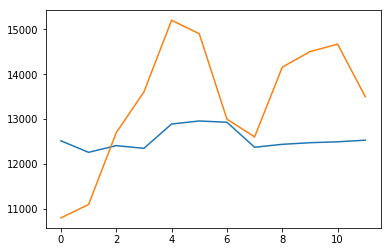

In [20]:
pred1 = fit1.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),1)))
pred1 = np.exp(pred1)
display(np.rint(pred1))
import matplotlib.pyplot as plt
plt.plot(np.rint(pred1))

entreno = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),1)))
entreno = np.exp(entreno)
display(np.rint(entreno))
plt.plot(np.rint(entreno))
plt.show()

In [18]:
#Compila el model con función de pérdidas MSE y optimizador rmsprop
# EL optimiador rmsprop actualiza el ritmo de aprendizaje del gradiente descendiente
fit1.compile(loss='mean_squared_error', optimizer='rmsprop')
#Ajustar el modelo
fit1.fit(x_train, y_train, batch_size = 1, epochs=10, shuffle=False)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.0022


## Vamo a entrenar el modelo

## Vamo a revisar qué tan bueno es el modelo

In [19]:
gru = GRU(50)(Input(shape = (10, 30)))

NameError: name 'GRU' is not defined

In [ ]:
print(gru.shape)

In [ ]:
gru = GRU(50, return_sequences = False, return_state = True)(Input(shape = (10, 30)))
print(gru[0].shape)         # shape of output
print(gru[1].shape)         # shape of hidden state

In [ ]:
gru = GRU(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))
print(gru[0].shape)         # shape of output
print(gru[1].shape)         # shape of hidden state

In [ ]:
output, hidden_state = GRU(50, return_sequences = True, return_state = True)(Input(shape = (10, 30)))
print(output.shape)
print(hidden_state.shape)

In [ ]:
# define una semilla para tener resultados repetibles
seed = 2016
np.random.seed(seed)
# Define el modelo secuencial
fit1 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit1.add(LSTM(output_dim=4, activation='tanh', inner_activation='hard_sigmoid',input_shape=(5, 1)))
#Agrega una capa densa con una slida y activación lineal
fit1.add(Dense(output_dim=1, activation='linear'))
#Compila el model con función de pérdidas MSE y optimizador rmsprop
# EL optimiador rmsprop actualiza el ritmo de aprendizaje del gradiente descendiente
fit1.compile(loss='mean_squared_error', optimizer='rmsprop')
#Ajustar el modelo
fit1.fit(x_train, y_train, batch_size = 1, nb_epoch=10, shuffle=False)